In [1]:
import rasterio as rio
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error
import seaborn as sns
from functools import reduce
from scipy.stats import gaussian_kde
from collections import defaultdict

In [4]:
def scaled(x):
    min_val, max_val = np.percentile(x, (2, 98))

    # Scale the pixel values to the range of 0-255
    return np.interp(x, (min_val, max_val), (0.1, 255)).astype(np.uint8)

def sigmoid(x):
    print(x.max(), x.min())
    return 255 / (1 + np.exp(-2 * (scaled(x) / 255 - 0.5)))

def get_detect_cloud_bands(img):
    bands = [sigmoid(img.read(b)) for b in img.indexes]
    bands = np.stack(bands)
    return bands.transpose(1,2,0).astype(np.uint8)

def get_tci(img):
    r = sigmoid(img.read(4))
    g = sigmoid(img.read(3))
    b = sigmoid(img.read(2))
    rgb = np.stack([r, g, b])
    rgb = (rgb.transpose(1, 2, 0)).astype(np.uint8)
    return rgb

def to_tci(img):
    return img[:, :, [3,2,1]]

def flatten(xs):
    return reduce(lambda x, y: list(x) + list(y), xs)

In [5]:
path = Path('../../imgs')
images = {p.name: p  for p in path.iterdir()}
path_imgs = [im for im in images['s2'].iterdir()]
rio_cloudless = {path : get_detect_cloud_bands(rio.open(path)) for path in path_imgs}
path_imgs = [im for im in images['s2_cloudy'].iterdir()]
rio_cloudies = {path: get_detect_cloud_bands(rio.open(path)) for path in path_imgs}
print(len(rio_cloudies), len(rio_cloudless))

2307 1729
7122 1095
8057 774
7187 440
4850 306
5199 503
6266 416
9471 435
5163 428
928 173
24 4
4466 248
4359 152
2030 1936
2058 1806
2495 2059
3758 2786
3982 2924
4310 3118
4601 3287
4412 3058
4752 3279
1569 1113
26 18
6122 4642
5178 3602
7285 1497
7544 1050
7310 746
7919 544
8201 581
8318 601
8460 603
8465 549
8560 591
6056 403
794 17
6933 423
6160 302
2345 1405
3340 955
3481 618
3529 404
3370 375
4495 320
5412 305
5660 252
5657 228
2045 126
28 9
4167 72
3355 59
2345 1391
3665 929
4708 615
3659 394
3442 352
4541 314
5489 291
5842 243
5882 208
2184 126
29 11
4561 82
4007 59
8163 1441
8868 1018
8732 711
9575 472
9879 643
10202 1187
10314 1375
10482 1252
10580 1498
7226 888
1001 24
8079 660
7125 312
9065 1123
10487 766
10601 505
11534 303
11128 329
11677 478
12267 542
11571 447
12703 586
2725 85
31 3
7504 269
4733 105
7245 1104
7905 753
7725 455
8558 290
8675 261
8935 222
9238 204
9035 181
9441 156
3962 68
38 6
7143 62
5950 57
4938 1176
5252 774
5077 495
5264 278
4995 278
5767 545
6443 

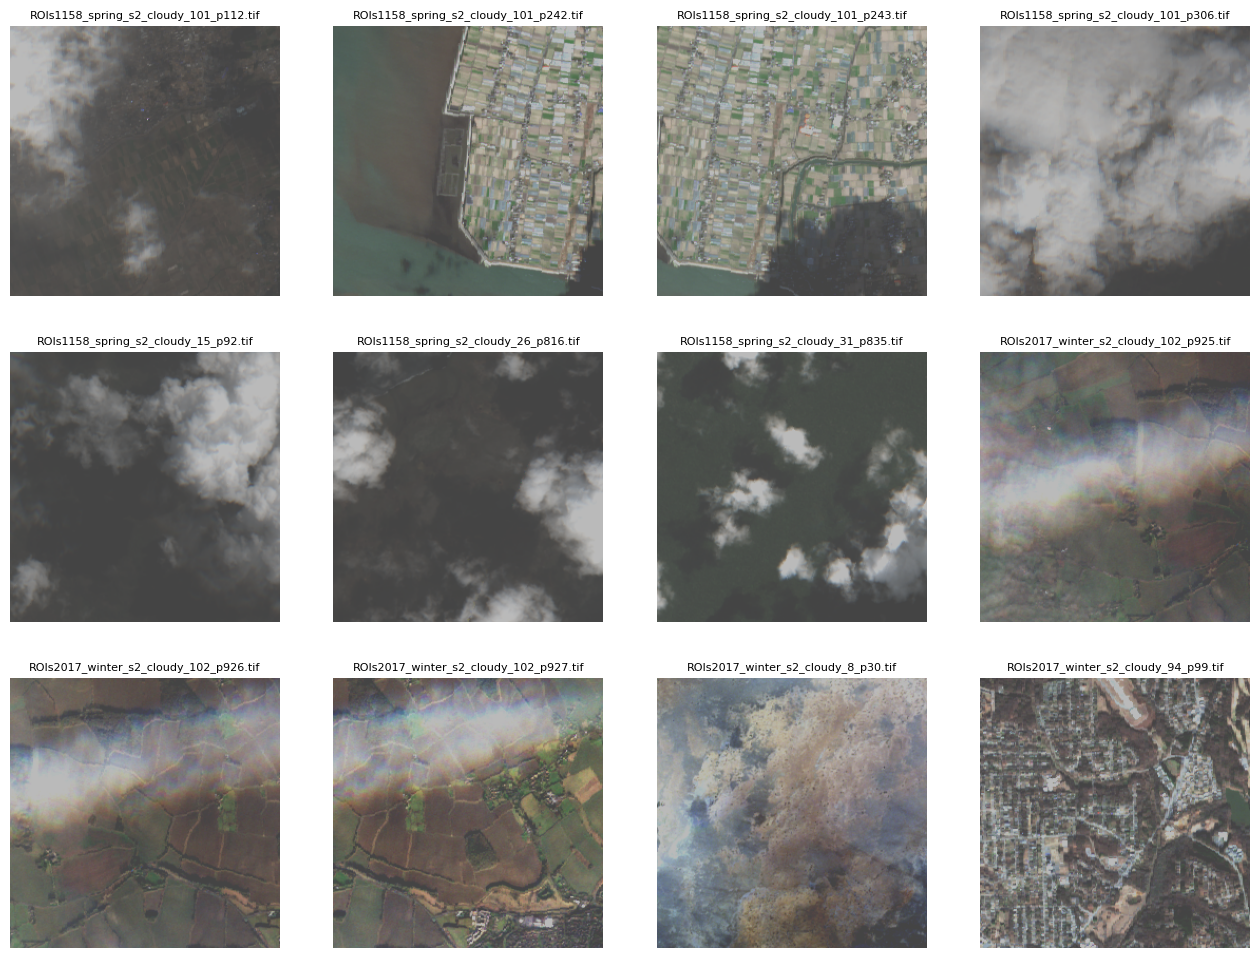

In [47]:
fig, axs = plt.subplots(3, 4, figsize=(4 * 4, 4 * 3))
axs = flatten(axs)
for ax, (path, array) in zip(axs, rio_cloudies.items()):
    ax.set_title(path.name,fontdict={"size": 8})
    img = to_tci(array)
    ax.imshow(img)
    ax.axis('off')